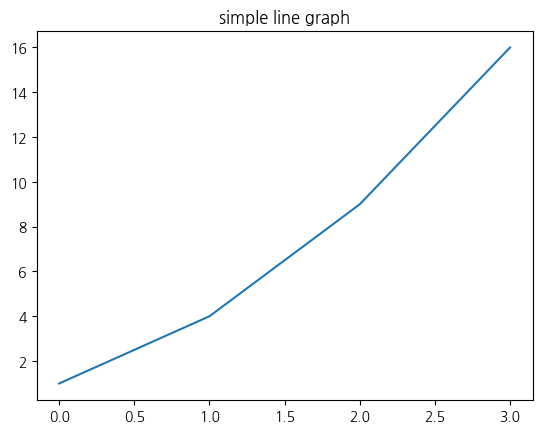

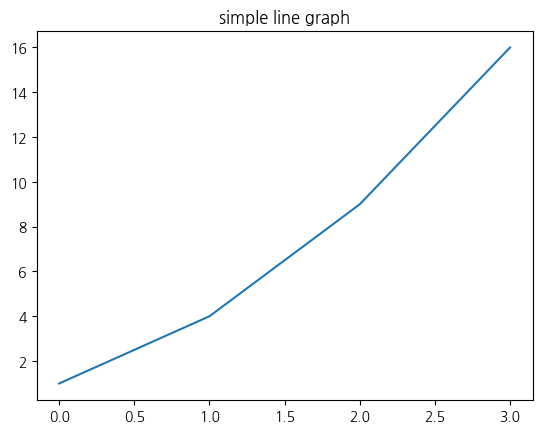

['NanumGothic']
['NanumGothic'] 11.0


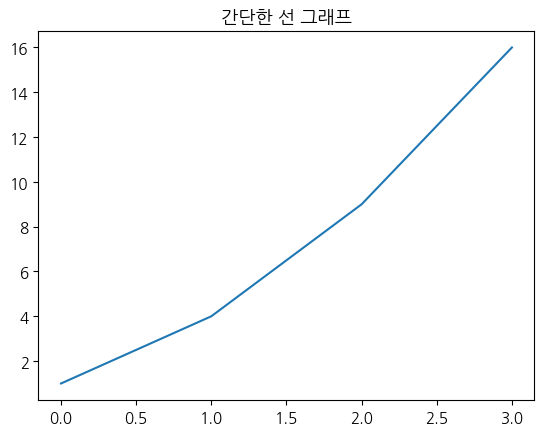

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 68.3MB/s]


출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64
0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool


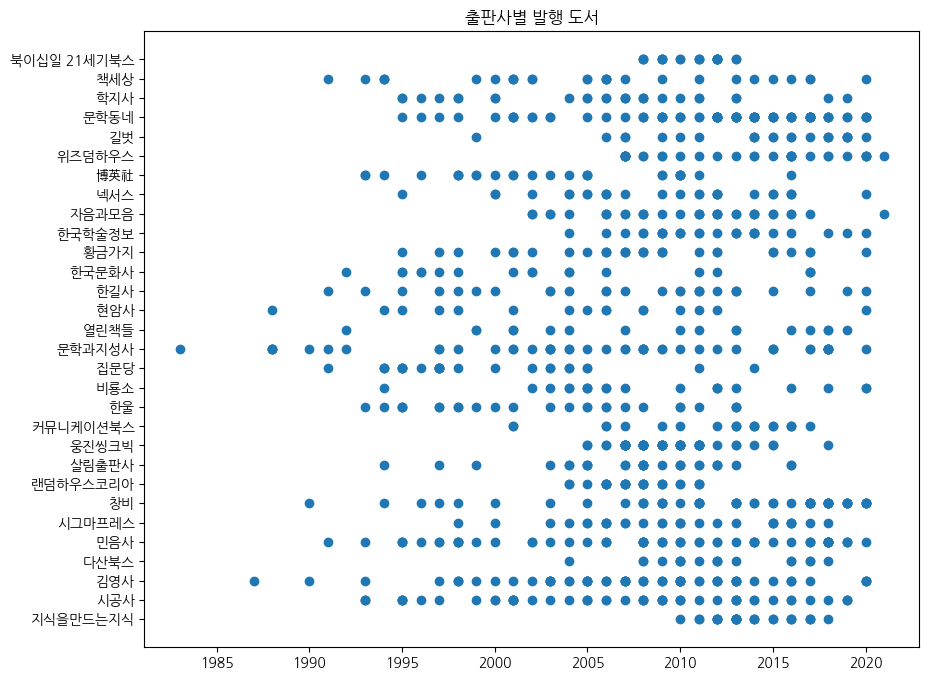

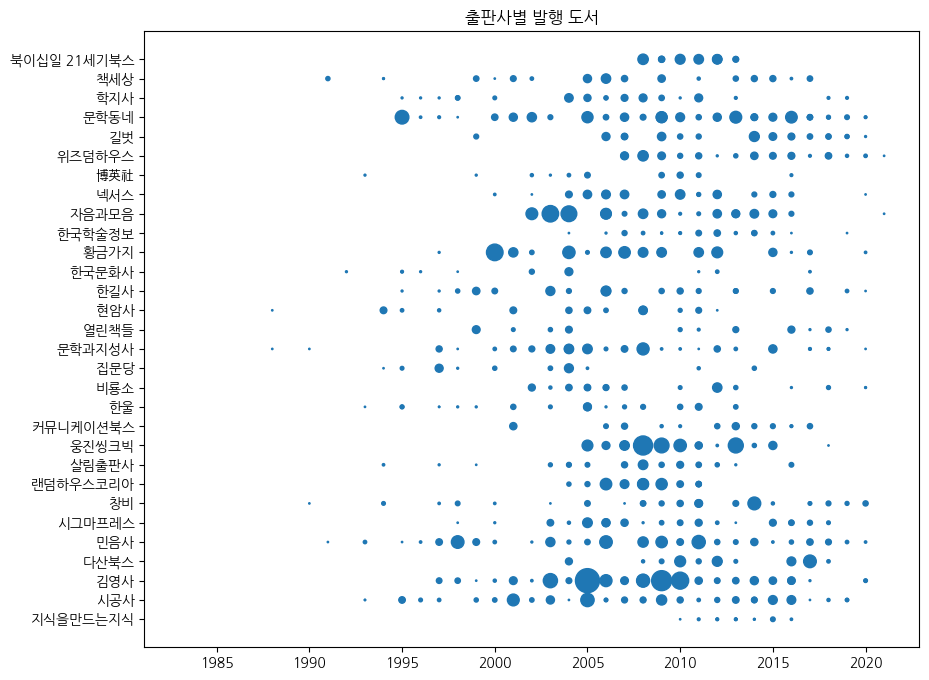

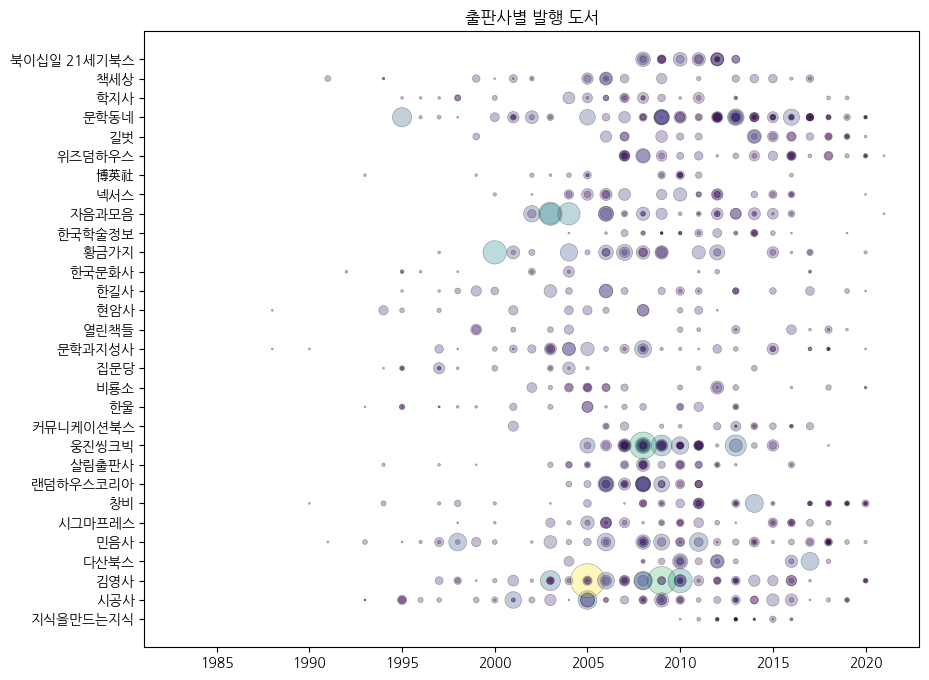

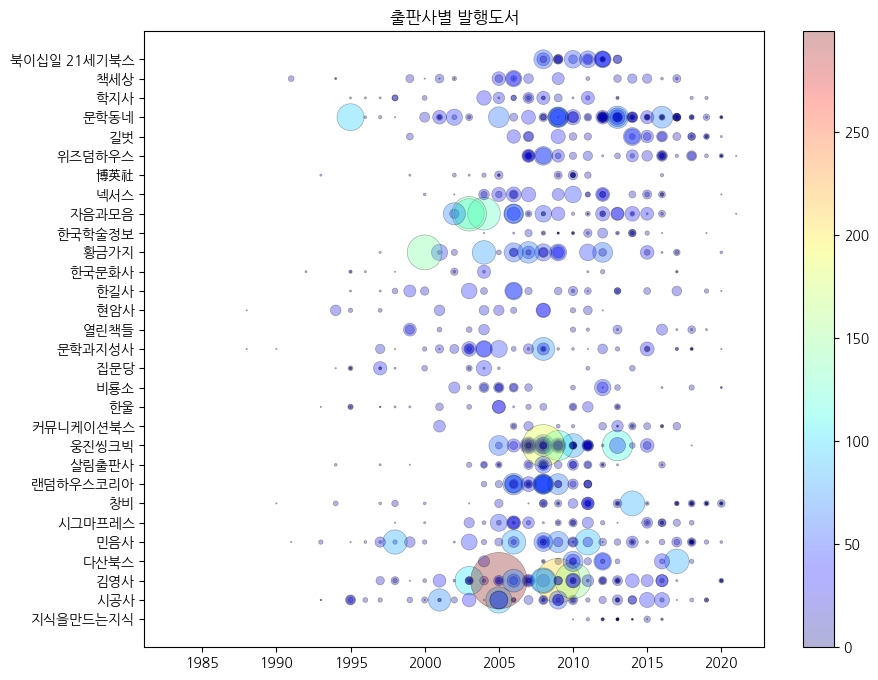

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# 그래프 그리는법 1. pyplot으로 일관된 그래프 설정하기
plt.plot([1,4,9,16]) # 인덱스 x축, 값 y축
plt.title('simple line graph')
plt.show()
# 그래프 그리는법 2. 객체지향 API로 그래프 그리기
fig, ax = plt.subplots() # 하나의 axes 객체를 가지는 피겨를 생성
ax.plot([1,4,9,16])
ax.set_title('simple line graph')
plt.show()
# 복잡한 그래프를 그리는 경우 객체지향 방식을 사용하는 것이 좋다.

# 그래프에 한글 출력하기
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# 폰트 지정하기 1. font.family 속성 이용
print(plt.rcParams['font.family']) # 기본 영문 폰트 : sans-serif
plt.rcParams['font.family'] = 'NanumGothic'
# 폰트 지정하기 2. rc() 함수 이용
plt.rc('font', family='NanumGothic', size=11) # rc()로 한 그룹 내의 여러 설정을 동시에 할 수 있다.
print(plt.rcParams['font.family'],plt.rcParams['font.size']) # 확인 가능

plt.plot([1,4,9,16])
plt.title('간단한 선 그래프')
plt.show()
plt.rc('font',size=10)

# 출판사별 발행 도서 개수 산점도 그리기
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

top30_pubs = ns_book7['출판사'].value_counts()[:30] # 출판사 발행 도서 top30 얻기
print(top30_pubs)

top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index) # 상위 30개에 해당하면 true, 아니면 false를 반환하는 불리언 배열
print(top30_pubs_idx)
top30_pubs_idx.sum() # 상위 30개 출판사의 도서 개수 : 51886

# 무작위로 1000개만 골라서 산점도에 그리자. 50000개는 너무 많음
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42) # sample 메소드와 random_state 매개변수로 랜덤하게 1000개 고르기

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'],ns_book8['출판사'])
ax.set_title('출판사별 발행 도서')
fig.show()

# 어떤 해에 얼마나 많이 도서가 대출되어있는지 모르니 값에 따라 마커 크기를 다르게 나타내보자.
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'],ns_book8['출판사'],s=ns_book8['대출건수']) # s 매개변수 : 하나의 실수로 바꾸면 모두 바뀌지만 ns_book8['대출건수']처럼 배열을 지정하면 각각 다른 산점도를 그릴 수 있다.
ax.set_title('출판사별 발행 도서')
fig.show()

# 마커 꾸미기
# 1. 투명도 조절하기 : alpha 매개변수
# 2. 마커 테두리 색 바꾸기 : edgecolor 매개변수
# 3. 마커 테두리 선 두께 바꾸기 : linewidths 매개변수
# 4. 산점도 색 바꾸기 : c 매개변수 : s처럼 배열을 전달하면 값이 높은것은 노랑색, 낮은것은 초록색으로 변한다.
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'],ns_book8['출판사'],s=ns_book8['대출건수']*2,alpha=0.3,edgecolor='k',linewidths=0.5,c=ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

# 값에 따라 색상 표현하기 : 컬러맵 기본은 viridis, jet = 값이 낮으면 파란색, 높으면 노란색
fig, ax = plt.subplots(figsize=(10, 8))
# ax.scatter을 하고 그 실행을 sc라는 객체에 옮기고 colorbor에 대응시켜주면 된다.
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet') # cmap(컬러맵)
ax.set_title('출판사별 발행도서')
fig.colorbar(sc) # 컬러 막대 생성을 위한 것
fig.show()